In [47]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# Plotting library
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces

# Optimization module in scipy
from scipy import optimize

# tells matplotlib to embed plots within the notebook
%matplotlib inline

In [48]:
# Read comma separated data
def splitRawData(data):
    X, y = data[:, 0:-1], data[:, -1]

    if len(X.shape)==1:
        X = np.c_[X] # convert to a column vector
    
    y = np.c_[y] #convert to a column vector

    return X,y



data = np.loadtxt(os.path.join('Data', 'ex1data1.txt'), delimiter=',')

X,y = splitRawData(data)
m = y.shape[0] # no of training data set
n = X.shape[1] # no of features

# print(m,n)

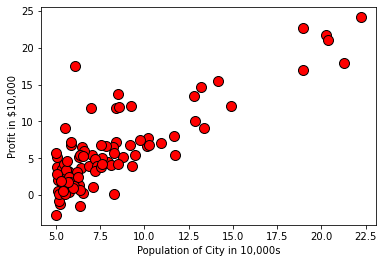

In [49]:
def plotData(x, y):
    fig = pyplot.figure()  # open a new figure
    
    # ====================== YOUR CODE HERE ======================= 
    pyplot.plot(x,y, 'or', ms=10, mec='k')
    pyplot.ylabel('Profit in $10,000')
    pyplot.xlabel('Population of City in 10,000s')

    # =============================================================



plotData(X,y)

In [50]:
def computeCostAndGradient(theta, X, y):
    
    # initialize some useful values
    m = y.shape[0]  # number of training examples
    theta = np.array(theta)
    theta = np.c_[theta] #convert to column vector

    X = np.concatenate([np.ones((m, 1)), X], axis=1)
    X = X.T
    y = y.T
    
    # You need to return the following variables correctly
    cost = 0
    grad = np.zeros(theta.shape[0])
    
    # ====================== YOUR CODE HERE =====================
    h = theta.T.dot(X)
    cost = np.sum((h-y)**2)/(2*m)
    grad = (X.dot((h-y).T))/m

    return cost, grad
    # ===========================================================



theta_init = np.zeros(n+1)

cost, grad = computeCostAndGradient(theta_init, X, y)
print('With theta = [0, 0] \nCost computed = {}'.format(cost))
print('Expected cost value (approximately) 32.07\n')

# further testing of the cost function
cost, grad = computeCostAndGradient(np.array([-1, 2]), X, y)
print('With theta = [0, 0] \nCost computed = {}'.format(cost))
print('Expected cost value (approximately) 54.24')


With theta = [0, 0] 
Cost computed = 32.072733877455676
Expected cost value (approximately) 32.07

With theta = [0, 0] 
Cost computed = 54.24245508201238
Expected cost value (approximately) 54.24


In [51]:
def gradientDescent(theta, X, y , alpha, num_iters):
    # Initialize some useful values
    m = y.shape[0]  # number of training examples
    theta = np.array(theta)
    theta = np.c_[theta] #convert to column vector
    
    J_history = [] # Use a python list to save cost in every iteration
    
    for i in range(num_iters):
        # ==================== YOUR CODE HERE =================================
        cost, grad = computeCostAndGradient(theta, X, y)
        theta = theta - (alpha*grad)
        # =====================================================================
        
        # save the cost J in every iteration
        J_history.append(cost)
    
    return theta, J_history



# some gradient descent settings
iterations = 1500
alpha = 0.01

theta, cost_history = gradientDescent(theta_init, X ,y, alpha, iterations)

print('Cost at theta found by gradient descent: {}'.format(cost_history[-1]))
print('Theta found by gradient descent: {}'.format(theta))
print('Expected theta values (approximately): [-3.6303, 1.1664]')

Cost at theta found by gradient descent: 4.483411453374869
Theta found by gradient descent: [[-3.63029144]
 [ 1.16636235]]
Expected theta values (approximately): [-3.6303, 1.1664]


In [52]:
# set options for optimize.minimize
options= {'maxiter': iterations}

# see documention for scipy's optimize.minimize  for description about
# the different parameters
# The function returns an object `OptimizeResult`
# We use truncated Newton algorithm for optimization which is 
# equivalent to MATLAB's fminunc
# See https://stackoverflow.com/questions/18801002/fminunc-alternate-in-numpy
optimized_result = optimize.minimize(computeCostAndGradient,theta_init,(X, y),jac=True,method='TNC',options=options)

# the fun property of `OptimizeResult` object returns
# the value of costFunction at optimized theta
cost = optimized_result.fun

# the optimized theta is in the x property
theta = optimized_result.x

# Print theta to screen
print('Cost at theta found by optimize.minimize: {}'.format(cost))

print('Theta found by gradient descent: {}'.format(theta))


Cost at theta found by optimize.minimize: 4.476971375975192
Theta found by gradient descent: [-3.89578126  1.19303368]


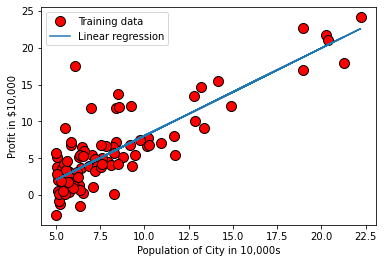

In [53]:
def predict(theta, X):
    m = X.shape[0]
    X = np.concatenate([np.ones((m, 1)), X], axis=1)
    X = X.T

    h = theta.T.dot(X)

    return h.T



# plot the linear fit
plotData(X, y)
h = predict(theta,X)
pyplot.plot(X, h, '-')
pyplot.legend(['Training data', 'Linear regression']);

Text(0.5, 1.0, 'Contour, showing minimum')

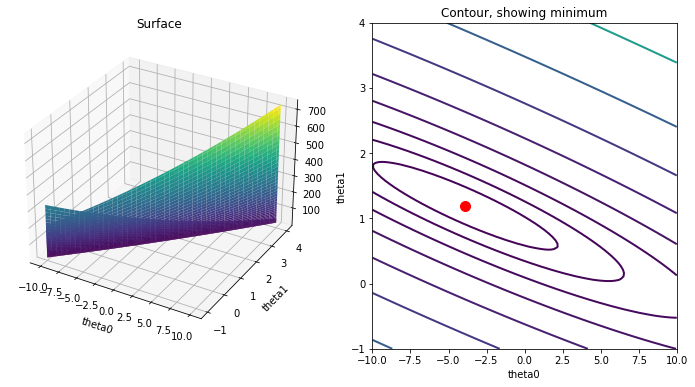

In [54]:
# grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# initialize J_vals to a matrix of 0's
J_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))


# Fill out J_vals

for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        J_vals[i,j],_ = computeCostAndGradient(np.array([theta0, theta1]),X,y)


# Because of the way meshgrids work in the surf command, we need to
# transpose J_vals before calling surf, or else the axes will be flipped
J_vals = J_vals.T

# surface plot
fig = pyplot.figure(figsize=(12, 6))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='viridis')
pyplot.xlabel('theta0')
pyplot.ylabel('theta1')
pyplot.title('Surface')

# contour plot
# Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
ax = pyplot.subplot(122)
pyplot.contour(theta0_vals, theta1_vals, J_vals, linewidths=2, cmap='viridis', levels=np.logspace(-2, 3, 20))
pyplot.xlabel('theta0')
pyplot.ylabel('theta1')
pyplot.plot(theta[0], theta[1], 'ro', ms=10, lw=2)
pyplot.title('Contour, showing minimum')

In [55]:
def  StandardScalar(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    # =========================== YOUR CODE HERE =====================
    
    for count in np.arange(mu.size):
        mu[count] = np.mean(X[:,count])
        sigma[count] = np.std(X[:,count])
    
    for count in np.arange(mu.size):
        X_norm[:,count] = (X_norm[:,count]-mu[count])/sigma[count]
    
    # ================================================================
    return X_norm, mu, sigma



def  MinMaxScalar(X):
    X_norm = X.copy()
    
    X_min = np.zeros(X.shape[1]);
    X_max = np.zeros(X.shape[1]);

    # =========================== YOUR CODE HERE =====================
    
    for count in np.arange(X_min.size):
        X_min[count] = np.min(X[:,count])
        X_max[count] = np.max(X[:,count])
    
    for count in np.arange(X_min.size):
        X_norm[:,count] = (X_norm[:,count]-X_min[count])/X_max[count]
    
    # ================================================================
    return X_norm, X_min, X_max




# call featureNormalize on the loaded data
# X_norm, mu, sigma = StandardScalar(X)
# print(X_norm)

# print('Computed mean:', mu)
# print('Computed standard deviation:', sigma)

In [56]:

# load new example dataset
data = np.loadtxt(os.path.join('Data', 'ex1data2.txt'), delimiter=',')

X,y = splitRawData(data)
m = y.shape[0] # no of training data set
n = X.shape[1] # no of features


# call featureNormalize on the loaded data
X_norm, mu, sigma = StandardScalar(X)


Cost at theta found by gradient descent: 2043282733.4920442
theta computed from gradient descent: [[340412.56301439]
 [109370.05670466]
 [ -6500.61509507]]


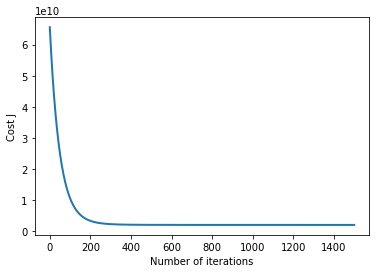

In [57]:
# Choose some alpha value - change this
alpha = 0.01
num_iters = 1500

# init theta and run gradient descent
theta_init = np.zeros(n+1)
theta, cost_history = gradientDescent(theta_init, X_norm, y , alpha, num_iters)

# Plot the convergence graph
pyplot.plot(np.arange(len(cost_history)), cost_history, lw=2)
pyplot.xlabel('Number of iterations')
pyplot.ylabel('Cost J')

# Display the gradient descent's result
print('Cost at theta found by gradient descent: {}'.format(cost_history[-1]))
print('theta computed from gradient descent: {}'.format(theta))

# ===================================================================


In [59]:
# set options for optimize.minimize
options= {'maxiter': iterations}

# see documention for scipy's optimize.minimize  for description about
# the different parameters
# The function returns an object `OptimizeResult`
# We use truncated Newton algorithm for optimization which is 
# equivalent to MATLAB's fminunc
# See https://stackoverflow.com/questions/18801002/fminunc-alternate-in-numpy
optimized_result = optimize.minimize(computeCostAndGradient,theta_init,(X, y),jac=True,method='TNC',options=options)

# the fun property of `OptimizeResult` object returns
# the value of costFunction at optimized theta
cost = optimized_result.fun

# the optimized theta is in the x property
theta = optimized_result.x

# Print theta to screen
print('Cost at theta found by optimize.minimize: {}'.format(cost))

print('Theta found by gradient descent: {}'.format(theta))

Cost at theta found by optimize.minimize: 2101630806.7479515
Theta found by gradient descent: [42914.1064423    139.24974636  5367.9820614 ]


In [62]:
def normalEqn(X, y):
    # initialize some useful values
    m = y.shape[0]  # number of training examples
    n = X.shape[1]
    
    theta = np.zeros(n+1)
    theta = np.c_[theta] #convert to column vector

    X = np.concatenate([np.ones((m, 1)), X], axis=1)
    
    
    # ===================== YOUR CODE HERE ============================
    #theta = pinv(X'*X)*X'*y;
    theta=((np.linalg.inv(X.T.dot(X))).dot(X.T)).dot(y)
    
    # =================================================================
    return theta

In [63]:
# Calculate the parameters from the normal equation

theta = normalEqn(X, y)

# Display normal equation's result
print('Theta computed from the normal equations: {}'.format(theta))


Theta computed from the normal equations: [[89597.9095428 ]
 [  139.21067402]
 [-8738.01911233]]
